In [15]:
import numpy as np
import pandas as pd
import scanpy as sc

In [16]:
adata=sc.read_csv('darmanis_imputed.csv',delimiter=',', first_column_names=None, dtype='float32')

In [17]:
adata=adata.T

In [18]:
adata

AnnData object with n_obs × n_vars = 466 × 8994

In [19]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

sc.pp.scale(adata, max_value=10)

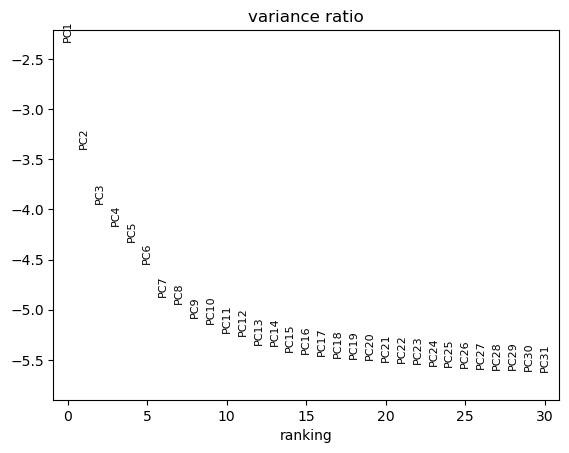

In [20]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [21]:
#create neighborhood graph using 20 pcs 
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
##dim reduction using umap
sc.tl.umap(adata)
#Leiden clustering
#import leidenalg
#sc.tl.leiden(adata2)
##visualizing clusters
#sc.pl.umap(adata2, color=['leiden'])

/home/zaman/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


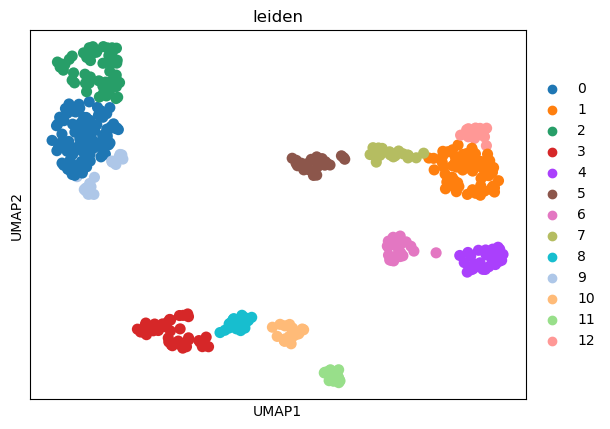

In [22]:
import leidenalg
sc.tl.leiden(adata)
##visualizing clusters
sc.pl.umap(adata, color=['leiden'])


In [23]:
adata.obs['leiden']

0       6
1      10
2      11
3      10
4      11
       ..
461     1
462     1
463     1
464     5
465     1
Name: leiden, Length: 466, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil = silhouette_score(adata.X, adata.obs['leiden'],metric='euclidean')
sil

-0.022170857

In [25]:
import pandas as pd
import numpy as np
l1=np.genfromtxt('darmanis_annotation.csv',dtype=None, delimiter=",")
l2=adata.obs['leiden']

/tmp/ipykernel_16244/2406137993.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  l1=np.genfromtxt('darmanis_annotation.csv',dtype=None, delimiter=",")


In [26]:
from sklearn import metrics
ari=metrics.adjusted_rand_score(l1,l2)
ari

/home/zaman/anaconda3/lib/python3.11/site-packages/sklearn/utils/multiclass.py:348: FutureWarning: Support for labels represented as bytes is deprecated in v1.5 and will error in v1.7. Convert the labels to a string or integer format.
  warnings.warn(


0.3443647042450303

In [27]:
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(l1, l2)
nmi

/home/zaman/anaconda3/lib/python3.11/site-packages/sklearn/utils/multiclass.py:348: FutureWarning: Support for labels represented as bytes is deprecated in v1.5 and will error in v1.7. Convert the labels to a string or integer format.
  warnings.warn(


0.5071703246337276

In [28]:
import matplotlib.pyplot as plt

# Run the clustering and UMAP
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'], show=False)

# Save the current figure as JPEG
plt.savefig("darmanis_clustering.jpeg", format='jpeg', dpi=300)
plt.close()


/home/zaman/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [40]:
import matplotlib.pyplot as plt

# Run UMAP and Leiden if not already done
sc.tl.umap(adata)
sc.tl.leiden(adata)

# Create the UMAP plot, return the figure object
fig = sc.pl.umap(
    adata,
    color=['leiden'],
    show=False,
    return_fig=True,
    title=None  # Disable automatic title so we set our own
)

# Get axes from the figure
ax = fig.axes[0]

# Set title and font size
ax.set_title("scDDI", fontsize=16)  # You can increase fontsize as needed

# Customize axis labels
ax.set_xlabel("UMAP1", fontsize=16)
ax.set_ylabel("UMAP2", fontsize=16)

# Increase tick label size
ax.tick_params(axis='both', which='major', labelsize=14)

# Save the figure
fig.savefig("darmanis_clustering.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.close(fig)


/home/zaman/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
